# 2) IACOV - Model Development for Prognosis - ICU
## Strategy 3) Training on hospitals of same region and testing on 30% of a specific hospital

Code below to import libraries when running this point forward

In [1]:
# !pip install npm nodejs

In [2]:
# !jupyter lab clean
# !jupyter lab build

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

C:\Users\carin\AppData\Local\Temp\ipykernel_23296\2017038996.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This code uses just 14 hospitals, since ICU or MV has no variation for 4 hospitals
#### - The code that prepares the data to run all strategies for ICU and MV is: PREPARING_DATA_TO_UCI_MV_ANALYSES
#### - df_iacov_en.csv (used for death) was replaced here by df_iacov_model_lean_14hosp.csv
#### - put df_iacov_model_lean_14hosp.csv in same folder as this notebook

In [4]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_model_lean_14hosp.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(6046, 30)

In [5]:
df_iacov_model.columns

Index(['city_hospital', 'age', 'male', 'race', 'heart_rate', 'resp_rate',
       'sys_press', 'dias_press', 'mean_press', 'temp', 'hemoglobin',
       'platelets', 'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv',
       'leukocytes', 'neutrophil', 'lymphocytes', 'basophils', 'eosinophils',
       'monocytes', 'crp', 'death', 'icu', 'mv', 'state', 'region', 'excluir'],
      dtype='object')

## 2.1) Assign binary outcome ICU to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [6]:
#22 predictors + outcome + Region/State
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'icu'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(6046, 26)

In [7]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [8]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(6046, 26)

In [9]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,14,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,98,0,float64,-0.060,6046.000,57.521,17.869,18.000,44.000,58.000,71.000,105.000
male,0,0.000,2,2790,float64,-0.155,6046.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,13.381,183,0,float64,0.611,5237.000,85.689,17.209,13.000,75.000,85.000,96.000,233.000
resp_rate,1457,24.099,69,1,float64,2.897,4589.000,21.881,6.380,0.000,18.000,20.000,24.000,108.000
sys_press,1336,22.097,215,0,float64,-0.279,4710.000,124.054,22.791,10.000,110.000,122.000,138.000,242.000
dias_press,1325,21.915,150,0,float64,-0.361,4721.000,74.608,14.626,6.000,67.000,76.000,81.000,141.000
mean_press,1366,22.593,1452,326,float64,-1.751,4680.000,83.731,28.475,0.000,78.981,90.000,98.648,166.000
temp,1173,19.401,128,1,float64,62.972,4873.000,36.430,4.976,0.000,36.000,36.300,36.800,372.000
hemoglobin,1904,31.492,226,0,float64,-0.628,4142.000,12.752,2.189,1.400,11.692,13.000,14.200,30.600


In [10]:
import ipywidgets as widgets
from IPython.display import clear_output

In [11]:
df_all_hospitals.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [12]:
# Hospitals excluded for ICU and MV analyses: 'HOSPSANTACASASP_FULL', 'HOSPGRUPOSANTA', 'HUTRIN_2021_02', 'RIO_DE_JANEIRO_HUCFF'
dropdown_hospital = widgets.Dropdown(options = ['Choose a hospital ...'
                                                ,'HC_USP'                     #SP
                                                ,'HOSPPORTUGUES_SALVADOR'     #BA
                                                ,'CEARA_UNIMED'               #CE
                                                ,'HRL_2021_02'                #GO - Luiziania
                                                ,'HMV_POA_02'                 #RS - Moinhos de Vento
                                                ,'RIO_DE_JANEIRO_UNIMED'      #RJ
                                                ,'HOSPSANTAJULIA_MANAUS'      #AM
                                                ,'HOSPSANTACATARINABLUMENAU'  #SC
                                                ,'HOSPSAOFRANCISCO_MOGIGUACU' #SP
                                                ,'PERNAMBUCO_FULL'            #PE
                                                ,'PELOTAS'                    #RS
                                                ,'CEARA_HUWC'                 #CE
                                                ,'HEVV'                       #ES - Vila Velha
                                                ,'AMAZONAS_HUGV'              #AM
#                                                 ,'GHC_02'                     #RS 
                                               ])

In [13]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [14]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [15]:
# !pip install ipywidgets

In [16]:
# !jupyter nbextension enable --py widgetsnbextension

In [17]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [19]:
display(dropdown_hospital)

Dropdown(index=1, options=('Choose a hospital ...', 'HC_USP', 'HOSPPORTUGUES_SALVADOR', 'CEARA_UNIMED', 'HRL_2…

**Filter all hospitals except the selected above**

In [20]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

**Split train/test of specific Hospital**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(1500, 26)

In [23]:
X_specific = df_iacov_model_lean_specific.drop(['icu'],axis=1)
X_specific.shape

(1500, 25)

In [24]:
y_specific = df_iacov_model_lean_specific['icu']
y_specific.shape

(1500,)

In [25]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [26]:
X_train_specific.shape

(1050, 25)

In [27]:
X_test_specific.shape

(450, 25)

**Filter all hospitals on same region as specific** 

PS: Also removed GHC hospital due to very low positive cases

In [28]:
#Filter all hospitals from the same region of the left out hospital, except the left out hospital
df_iacov_model_lean = df_all_hospitals[ (df_all_hospitals.region == df_all_hospitals[df_all_hospitals.city_hospital==specific_hospital].region.iloc[0]) &
                                        (df_all_hospitals.city_hospital != specific_hospital) & (df_all_hospitals.city_hospital != 'GHC_02')]

In [29]:
#check data without specific
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
RIO_DE_JANEIRO_UNIMED         449
HOSPSAOFRANCISCO_MOGIGUACU    124
HEVV                           56
Name: count, dtype: int64

In [30]:
print("Specific: " + specific_hospital )
print("(training - all hospitals same region) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

Specific: HC_USP
(training - all hospitals same region) dataset: (629, 26)

(training - specific) dataset: (1050, 25)

(test - specific) dataset: (450, 25)


### 2.1.3) Dropping unused variables (All hospitals)

In [31]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(629, 25)

In [32]:
#Preencho NAs com 0 
df_iacov_model_lean['icu'] = df_iacov_model_lean['icu'].fillna(0)
df_iacov_model_lean.icu.value_counts()

icu
1    354
0    275
Name: count, dtype: int64

In [33]:
#Check proportion of deaths on training data 
(df_iacov_model_lean.icu.value_counts()/len(df_iacov_model_lean.icu))*100

icu
1   56.280
0   43.720
Name: count, dtype: float64

### From now on the outcome will call CLASS

In [34]:
df_iacov_model_lean['class'] = df_iacov_model_lean['icu'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['icu'],axis=1)

### 2.1.4) Recalculating null mean_press

In [35]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [36]:
#Check mean_press missing before recalculating
#column_summaries(df_iacov_model_lean)

In [37]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [38]:
#Check mean_press missing after recalculating
#column_summaries(df_iacov_model_lean)

In [39]:
#column_summaries(df_iacov_model_lean_specific)

In [40]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [41]:
#column_summaries(X_test_specific)

### Put X_test and y_test in separate files

In [42]:
x_test_specific_name = 'X_test_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
x_test_specific_name

'X_test_SUDESTE_SP_HC_USP.csv'

In [43]:
y_test_specific_name = 'y_icu_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
y_test_specific_name

'y_icu_SUDESTE_SP_HC_USP.csv'

In [44]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(450, 25)

In [45]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(450,)

## 2.2) Prepare Experiment 

###  All hospitals on same region of specific hospital except specific hospital

In [46]:
df_iacov_model_lean.shape

(629, 25)

In [47]:
df_iacov_model_train = df_iacov_model_lean

In [48]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)

__Atention!__: If any Dtype is bool, cast to int32, otherwise experiment will fail

In [49]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 965 to 5050
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              629 non-null    float64
 1   male             629 non-null    float64
 2   heart_rate       609 non-null    float64
 3   resp_rate        574 non-null    float64
 4   sys_press        599 non-null    float64
 5   dias_press       599 non-null    float64
 6   mean_press       602 non-null    float64
 7   temp             572 non-null    float64
 8   hemoglobin       596 non-null    float64
 9   platelets        597 non-null    float64
 10  hematocrit       153 non-null    float64
 11  red_cells_count  596 non-null    float64
 12  hcm              580 non-null    float64
 13  rdw              580 non-null    float64
 14  mcv              580 non-null    float64
 15  leukocytes       595 non-null    float64
 16  neutrophil       476 non-null    float64
 17  lymphocytes      5

In [50]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(629, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [53]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [54]:
X_train.shape

(496, 22)

In [55]:
X_test.shape

(189, 22)

In [56]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [57]:
seed

42

### Filtering only 5 pre-selected models

In [58]:
# print(inspect.getsource(compare_models))

In [59]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.841000,0.916500,0.818800,0.863200,0.861600,0.836400,0.681900,0.024000,0.083400,0.494500
1,Extreme Gradient Boosting,0.840900,0.909600,0.831200,0.851000,0.851700,0.839100,0.681900,0.040200,0.071700,0.480300
2,CatBoost Classifier,0.818500,0.908400,0.778000,0.859000,0.849500,0.809100,0.636900,0.470200,0.507900,0.511100


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [60]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.800,0.861,0.840,0.760,0.778,0.808,0.600,0.352,0.296,0.402
1,0.760,0.890,0.680,0.840,0.809,0.739,0.520,0.075,0.224,0.392
2,0.800,0.938,0.760,0.840,0.826,0.792,0.600,0.470,0.436,0.567
3,0.920,0.946,0.920,0.920,0.920,0.920,0.840,0.304,0.450,0.686
4,0.800,0.885,0.800,0.800,0.800,0.800,0.600,0.783,0.353,0.440
5,0.860,0.904,0.840,0.880,0.875,0.857,0.720,0.594,0.268,0.507
6,0.837,0.983,0.720,0.958,0.947,0.818,0.675,0.142,0.705,0.623
7,0.775,0.843,0.760,0.792,0.792,0.775,0.551,0.014,0.035,0.336
8,0.796,0.898,0.750,0.840,0.818,0.783,0.591,0.353,0.789,0.485
9,0.857,0.933,0.833,0.880,0.870,0.851,0.714,0.157,0.991,0.614


In [61]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.840,0.846,0.960,0.720,0.774,0.857,0.680,0.000,0.000,0.345
1,0.780,0.880,0.760,0.800,0.792,0.775,0.560,0.000,0.000,0.343
2,0.880,0.931,0.880,0.880,0.880,0.880,0.760,0.101,0.075,0.539
3,0.940,0.941,1.000,0.880,0.893,0.943,0.880,0.000,0.796,0.731
4,0.860,0.891,0.920,0.800,0.821,0.868,0.720,0.000,0.002,0.485
5,0.860,0.912,0.880,0.840,0.846,0.863,0.720,0.000,0.000,0.449
6,0.898,0.958,0.880,0.917,0.917,0.898,0.796,0.170,0.967,0.672
7,0.816,0.867,0.840,0.792,0.808,0.824,0.632,0.000,0.000,0.376
8,0.857,0.917,0.875,0.840,0.840,0.857,0.714,0.016,0.081,0.525
9,0.939,0.945,0.958,0.920,0.920,0.939,0.878,0.001,0.272,0.708


In [62]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.760,0.818,0.840,0.680,0.724,0.778,0.520,0.022,0.115,0.316
1,0.720,0.874,0.600,0.840,0.789,0.682,0.440,0.086,0.046,0.319
2,0.760,0.909,0.720,0.800,0.783,0.750,0.520,0.710,0.268,0.463
3,0.900,0.944,0.920,0.880,0.885,0.902,0.800,0.172,0.906,0.650
4,0.840,0.867,0.840,0.840,0.840,0.840,0.680,0.000,0.142,0.417
5,0.820,0.910,0.840,0.800,0.808,0.824,0.640,0.599,0.231,0.516
6,0.837,0.945,0.760,0.917,0.905,0.826,0.674,0.547,0.959,0.564
7,0.775,0.840,0.760,0.792,0.792,0.775,0.551,0.003,0.002,0.289
8,0.775,0.883,0.708,0.840,0.809,0.756,0.550,0.129,0.565,0.430
9,0.878,0.938,0.833,0.920,0.909,0.870,0.755,0.279,0.916,0.622


### Select best algorithm based on AUC in predicts 
### Best Model
Selected manually based on AUC, next Precision

In [63]:
preds_cat = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.762,0.850,0.755,0.771,0.808,0.780,0.521,0.009,0.002,0.327


In [64]:
preds_lgb = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.762,0.831,0.830,0.675,0.765,0.796,0.511,0.000,0.000,0.233


In [65]:
preds_xgb = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.725,0.831,0.726,0.723,0.770,0.748,0.446,0.000,0.000,0.272


### Best model

In [66]:
# Put in PREDS the best algorithm chosen in the previous lines: preds_cat OR preds_lgb OR preds_xgb
preds = preds_cat
#preds = preds_lgb
#preds = preds_xgb

In [67]:
npv(y_test, preds['Label'])

0.7111111111111111

In [68]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'].values)]

['0.80', '0.90']

,,
,,
Ground Truth Prevalence,. . .,0.561
Test set Prevalence,. . .,0.524
True positive rate (recall),. . .,0.755
False positive rate,. . .,0.229
Positive predictive value (precision),. . .,0.808
True negative rate (specificity),. . .,0.771
False negative rate,. . .,0.245
Negative predictive value,. . .,0.711
Positive likelihood ratio (bigger is better),. . .,3.297


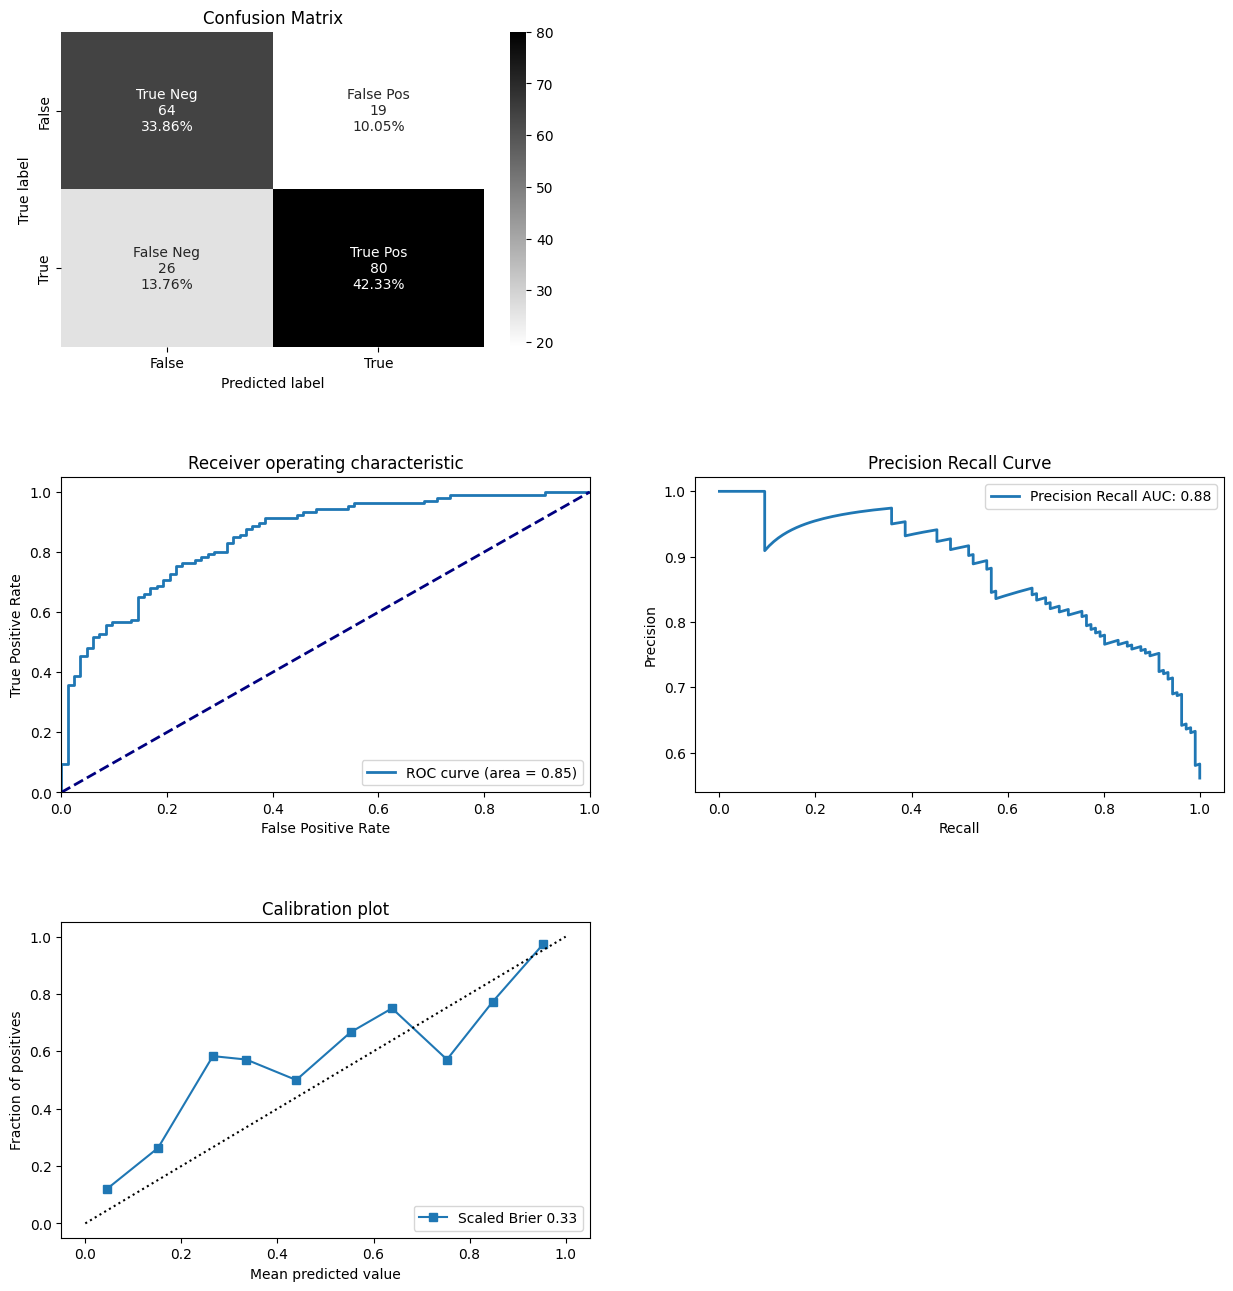

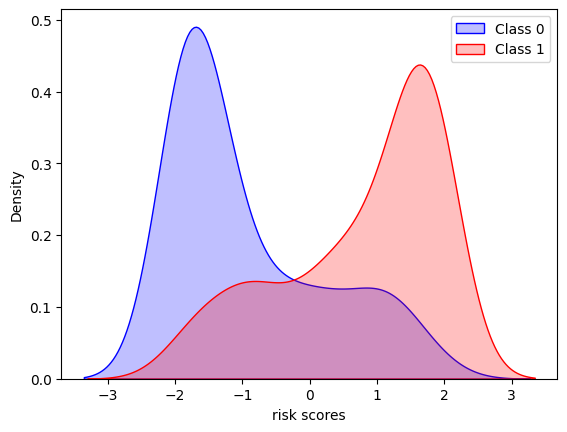

,,
,,
Ground Truth Prevalence,. . .,0.561
Test set Prevalence,. . .,0.524
True positive rate (recall),. . .,0.755
False positive rate,. . .,0.229
Positive predictive value (precision),. . .,0.808
True negative rate (specificity),. . .,0.771
False negative rate,. . .,0.245
Negative predictive value,. . .,0.711
Positive likelihood ratio (bigger is better),. . .,3.297


In [69]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results
#### Run INTERPRETE_MODEL only for the best algorithm chosen in the previous lines

In [70]:
#evaluate_model(cattuned)

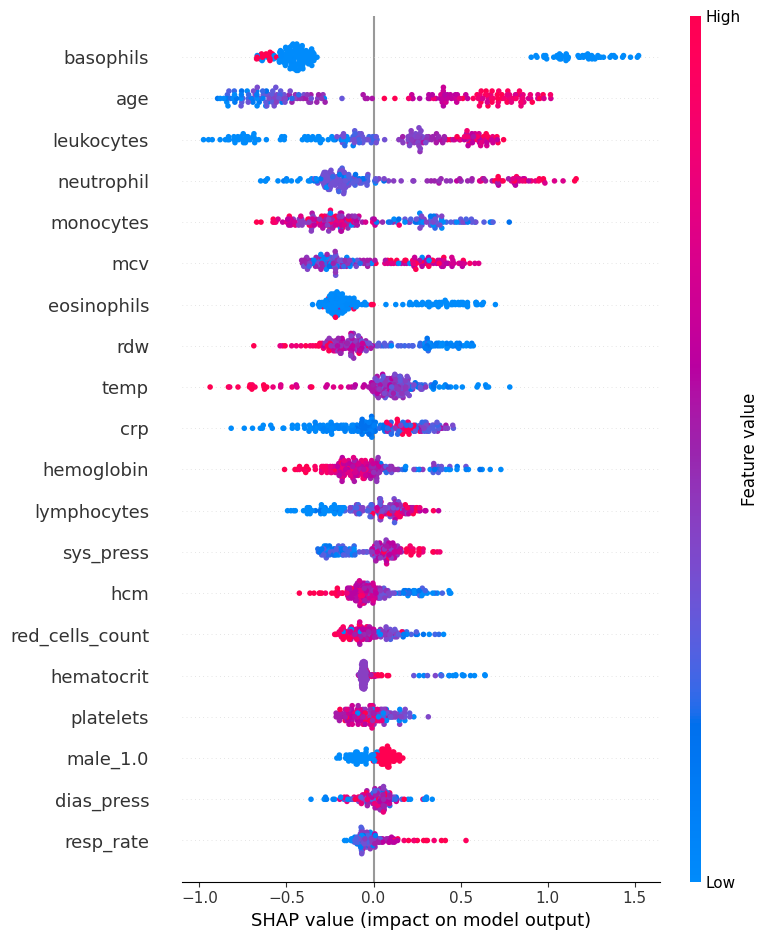

In [71]:
interpret_model(cattuned)
#interpret_model(lgbmtuned)
#interpret_model(xgbtuned)

In [72]:
#plot_model(xgbtuned, plot='ktops')

### 2.3.1) Build a model with all data
#### Run FINALIZE MODEL only for the best algorithm chosen in the previous lines

In [73]:
final_model = finalize_model(cattuned)
#final_model = finalize_model(lgbmtuned)
#final_model = finalize_model(xgbtuned)

In [74]:
str(final_model.__class__.__name__)

'CatBoostClassifier'

In [75]:
final_model_name = str(final_model.__class__.__name__) + '_same_region_vs_one_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
final_model_name

'CatBoostClassifier_same_region_vs_one_SUDESTE_SP_HC_USP'

In [76]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [77]:
final_model
#final_model.get_all_params()

# Use the saved model to predict on specific hospital
## SAME_REGION_VS_ONE is the name of this strategy

In [78]:
import pickle
import joblib

#Carrego o modelo unico
print('loaded: ' + final_model_name)

same_region_vs_one_model_pkl = final_model_name + ".pkl"
prep_pipe_same_region_vs_one, same_region_vs_one_model = joblib.load(same_region_vs_one_model_pkl)

# AS DUAS LINHAS ABAIXO ESTAVAM COM O NOME DA ESTRATÉGIA 2 
# all_except_one_model_pkl = final_model_name + ".pkl"
# prep_pipe_all_except_one, all_except_one_model = joblib.load(all_except_one_model_pkl)

loaded: CatBoostClassifier_same_region_vs_one_SUDESTE_SP_HC_USP


In [79]:
same_region_vs_one_model.__class__.__name__

'CatBoostClassifier'

In [80]:
x_test_specific_name

'X_test_SUDESTE_SP_HC_USP.csv'

In [81]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(450, 25)

In [82]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [83]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["icu"]
y_test_single.shape

(450,)

In [84]:
pd.set_option('display.max_columns', None)
X_test_single.head()

,city_hospital,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state
2326,HC_USP,71.000,0.000,70.000,25.000,97.000,52.000,66.985,36.500,11.000,311000.000,35.000,NaN,27.700,13.900,87.300,15670.000,14180.000,1110.000,0.010,NaN,0.370,1.492,SUDESTE,SP
1933,HC_USP,21.000,0.000,106.000,22.000,117.000,71.000,86.318,36.000,NaN,159000.000,NaN,NaN,29.300,13.400,83.600,8980.000,8350.000,270.000,0.090,NaN,0.270,2.664,SUDESTE,SP
1267,HC_USP,49.000,1.000,79.000,36.000,103.000,61.000,74.986,37.700,NaN,337000.000,NaN,NaN,28.500,14.600,87.500,8410.000,6810.000,1220.000,0.010,NaN,0.370,3.107,SUDESTE,SP
1877,HC_USP,52.000,0.000,141.000,25.000,166.000,102.000,123.312,37.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUDESTE,SP
1031,HC_USP,75.000,1.000,74.000,28.000,120.000,70.000,86.650,33.600,NaN,117000.000,NaN,NaN,29.700,15.700,83.400,8110.000,7100.000,470.000,0.000,NaN,0.540,NaN,SUDESTE,SP


In [85]:
X_test_single["class"] = y_test_single

In [86]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [87]:
X_test_single_transformed = prep_pipe_same_region_vs_one.fit_transform(X_test_single)

# A LINHA ABAIXO ESTAVA COM O NOME DA ESTRATÉGIA 2
#X_test_single_transformed = prep_pipe_all_except_one.fit_transform(X_test_single)


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Numeric
resp_rate,Numeric
sys_press,Numeric
dias_press,Numeric
mean_press,Numeric
temp,Numeric
hemoglobin,Numeric
platelets,Numeric


In [88]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [89]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0'],
      dtype='object')

In [90]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

['eosinophils', 'red_cells_count']

In [91]:
X_test_single_transformed.shape

(450, 20)

In [92]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0'],
      dtype='object')

### Add missing columns to some hospitals that didn't collect all columns
e.g. HC_USP (missing: red_cells_count and eosinophils)

In [93]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [94]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0', 'eosinophils', 'red_cells_count'],
      dtype='object')

In [95]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

**Reorder columns**

In [96]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [97]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(450, 22)

0.6902632071937056


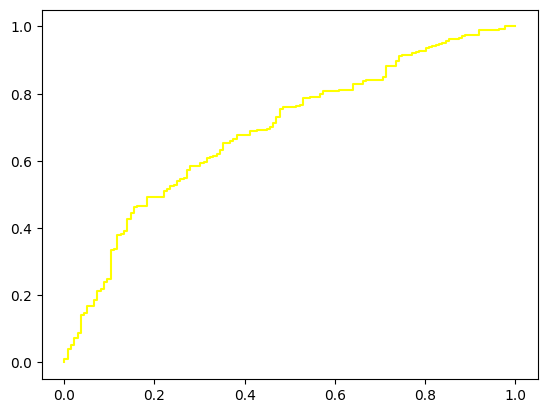

In [98]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = same_region_vs_one_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - best model - AUC " +  str(auc_ind), color="yellow")

In [99]:
y_pred = same_region_vs_one_model.predict(X_test_single_transformed)

In [100]:
y_test_single.value_counts()

icu
1    314
0    136
Name: count, dtype: int64

,,
,,
Ground Truth Prevalence,. . .,0.698
Test set Prevalence,. . .,0.682
True positive rate (recall),. . .,0.761
False positive rate,. . .,0.500
Positive predictive value (precision),. . .,0.779
True negative rate (specificity),. . .,0.500
False negative rate,. . .,0.239
Negative predictive value,. . .,0.476
Positive likelihood ratio (bigger is better),. . .,1.522


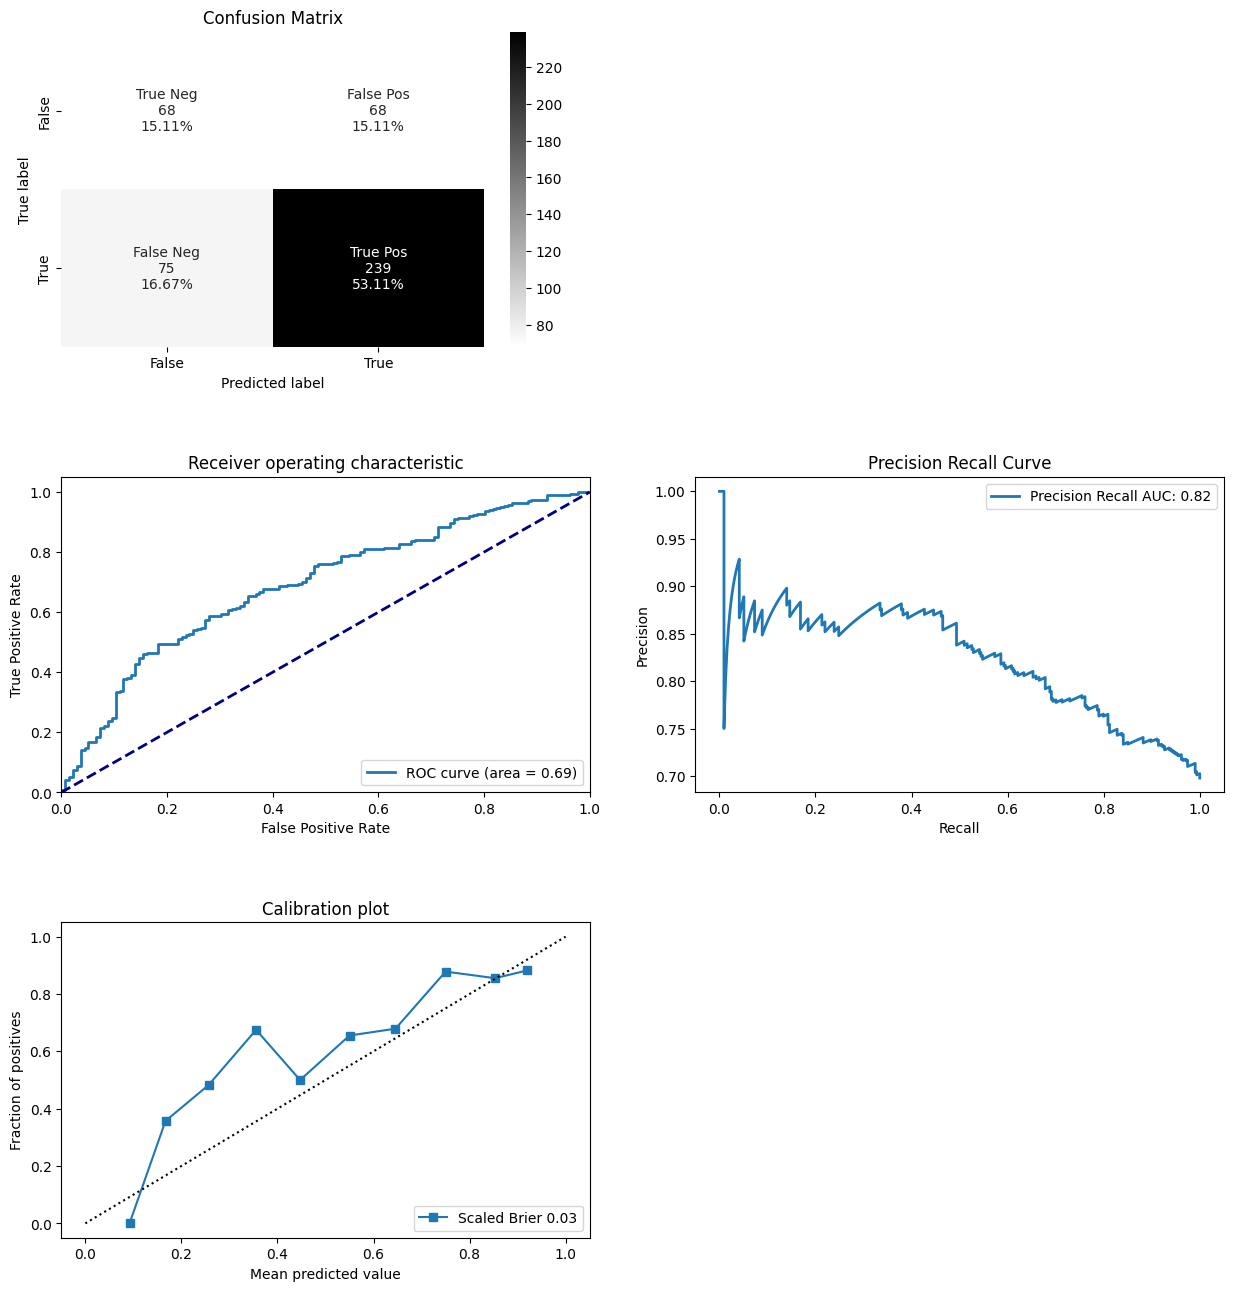

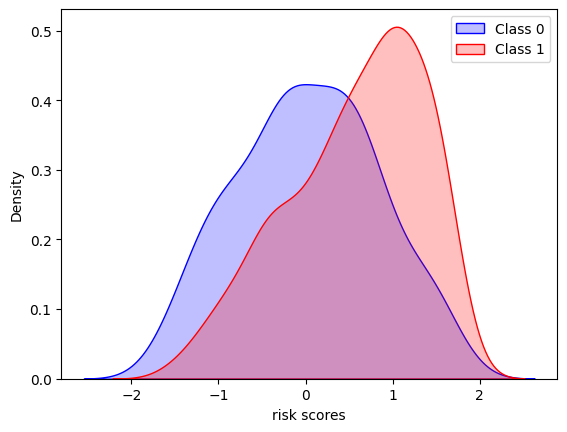

,,
,,
Ground Truth Prevalence,. . .,0.698
Test set Prevalence,. . .,0.682
True positive rate (recall),. . .,0.761
False positive rate,. . .,0.500
Positive predictive value (precision),. . .,0.779
True negative rate (specificity),. . .,0.500
False negative rate,. . .,0.239
Negative predictive value,. . .,0.476
Positive likelihood ratio (bigger is better),. . .,1.522


In [101]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, pd.Series(y_pred_prob1))

In [102]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.6902632071937056

In [103]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.64', '0.74']

In [104]:
# y_test_single

In [105]:
#recall
tpr(y_test_single, y_pred)

0.7611464968152867

In [106]:
#specificidade
tnr(y_test_single, pd.Series(y_pred))

0.5

In [107]:
#accuracy
accuracy(y_test_single, y_pred)

0.6822222222222222

In [108]:
ppv(y_test_single, y_pred)

0.7785016286644951

In [109]:
npv(y_test_single, y_pred)

0.4755244755244755

# End of File